In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import ttest_ind
from sklearn.metrics import confusion_matrix
from  sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder 
from sklearn .linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn .ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import sklearn.tree as tr
from sklearn.tree import export_graphviz
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [2]:
train=pd.read_csv("train.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:xlabel='Age', ylabel='Count'>

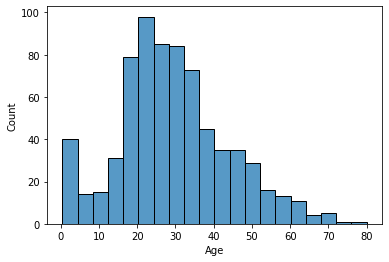

In [6]:
sns.histplot(x="Age",data=train)

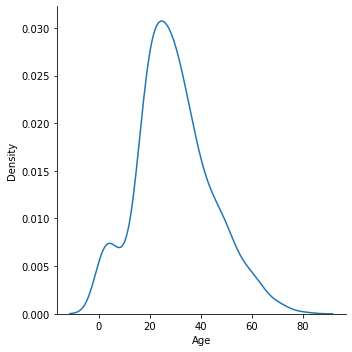

In [7]:
sns.displot(x="Age",data=train, kind="kde")

**observation**

1. from this graph , we can see that the distribution of age closely appropraite normal 
2. from this graph we can deduce that there are more people between the age of 20 to 50 in ship 

In [8]:
mean=train['Age'].mean()
train['Age'].fillna(mean,inplace=True)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

**observation**

1. we can observe that 549 persons died from the ship wreck 
2. we can observe that 342 persons survived the ship wreck

In [11]:
train['Survived'].value_counts(normalize=True)*100

0    61.616162
1    38.383838
Name: Survived, dtype: float64

**obsevation**

1. we have more people that died from the ship wreck

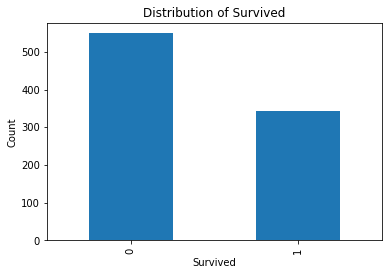

In [12]:
train['Survived'].value_counts().plot(kind='bar')
plt.title('Distribution of Survived')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

In [13]:
# distribution of Survived and non Survived
Survived = train[train['Survived'] == 1]
Survived

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [14]:
non_Survived = train[train['Survived'] == 0]
non_Survived

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.000000,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.000000,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S


<AxesSubplot:xlabel='Survived', ylabel='Age'>

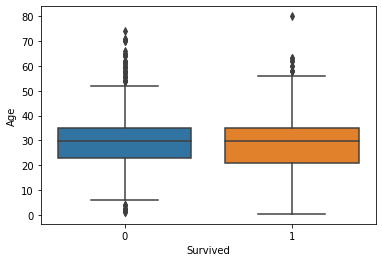

In [15]:
sns.boxplot(x="Survived",y="Age", data=train)

**observation**

1. 75 percent of people below the age of 35 died from the shipwreck.

75 percent of people below the age of 35 survived the shipwreck.

the rate of people that survived has high variablity(more spread)

due to the presence of outliers, we can then conclude that if childern from 8 years below dies it is said to be an abnormality 

due to the closeness of the median , we can conclude that age is not really a  signnificant factor to determine survival rate 



In [16]:
def bin_age(x):
    if x<=12:
        return"child"
    if x>=13 and x<=19:
        return"teen"
    if x>=20 and x<=35:
         return "youth"
    if x>=36 and x<59:
        return "middle aged"
    if x>=60:
        return"aged"
    

In [17]:
train["Age_group"]=train["Age"].apply(lambda x: bin_age(x))

In [18]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,youth
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,middle aged
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,youth
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,youth
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,youth


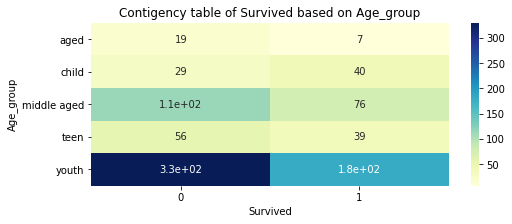

In [19]:
contigency_pct = pd.crosstab(train["Age_group"], train['Survived'])
fig = plt.figure(figsize=(8,3))
plt.title('Contigency table of Survived based on Age_group')
sns.heatmap(contigency_pct, annot=True, cmap="YlGnBu")
fig.savefig('heatmap.jpg', dpi=300)
plt.show()

In [20]:
contigency_pct

Survived,0,1
Age_group,,
aged,19,7
child,29,40
middle aged,113,76
teen,56,39
youth,330,180


**observation**

1. we can observe that out of the 26 Aged people on board, 73% died while 26% survived.
2. out of 69 childern on board, 42% died while 57.9% survived
3.  out of the 189 middle Aged on board, 58.7% died while 40.2 survived 
4. out of the 95 teens on board , 62% died while 41% survived
5. out of the 510 youth on board, 64.70 % died while 35.29% survived


In [21]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:xlabel='Sex', ylabel='Count'>

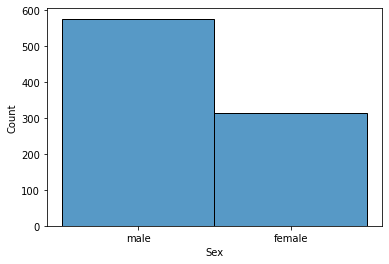

In [22]:
sns.histplot(x="Sex",data=train)

**observation**

1. we have more people of the male gender that boarded the ship 

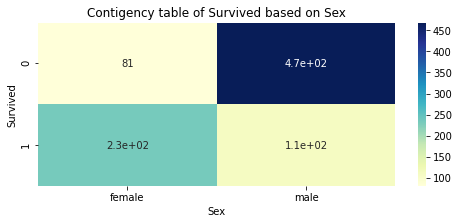

In [23]:
contigency_pct = pd.crosstab(train['Survived'], train['Sex'])
fig = plt.figure(figsize=(8,3))
plt.title('Contigency table of Survived based on Sex')
sns.heatmap(contigency_pct, annot=True, cmap="YlGnBu")
fig.savefig('heatmap.jpg', dpi=300)
plt.show()

**observation**

1. from this we can observed that 81 females died while 230 over females survived.
2. over 470 males died and while more than 110 males survived . 

In [24]:

contigency_pct

Sex,female,male
Survived,,
0,81,468
1,233,109


**observation**

1. out of the 314 females on the ship, 25.7% died while 74% survived.
2. out of the 578 males on the ship, 81% died while 18.8% survived

<AxesSubplot:xlabel='Sex', ylabel='Age'>

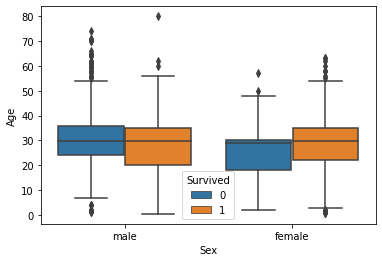

In [25]:
sns.boxplot(x="Sex",y="Age", data=train, hue='Survived')

**observation**
1. from this we can deduce that age is not really a sinificant factor to determine the survival rate of females and males 
2. due to the presence of outliers, if males below the age of 8 dieds ther said to be an abnormality
3. if females below the age of 5 survives there is said to be an abnormality


In [26]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

**observation**

1. they are 491 people in the 3 class 
2. they are  184 peope in the 2 class
3. they are 216 people in the 1 class

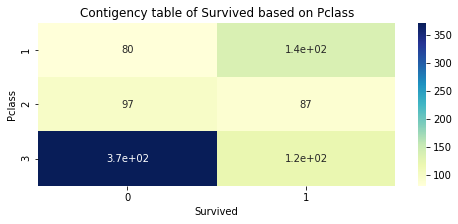

In [27]:
contigency_pct = pd.crosstab(train["Pclass"], train['Survived'])
fig = plt.figure(figsize=(8,3))
plt.title('Contigency table of Survived based on Pclass')
sns.heatmap(contigency_pct, annot=True, cmap="YlGnBu")
fig.savefig('heatmap.jpg', dpi=300)
plt.show()

In [28]:
contigency_pct

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


**observation**
1. 80 people died while 136 people survived in pclass 1
2. 97 people died while 87 people survived in pclass 2
3. 372 people died while 119 people survived in Pclass 3


In [29]:
# Those that are in Pclass level 1
mask = train['Pclass'] == 1
level1 = train[mask]

# Those that are in Pclass level 2
mask = train['Pclass'] == 2
level2 = train[mask]

# Those that are in pclass level 3
mask = train['Pclass'] == 3
level3 = train[mask]



In [30]:
level1_df = pd.DataFrame()
level1_df['Survived'] = ['no-Survived', 'Survived']
level1_df['count %'] = np.array(level1.Survived.value_counts(normalize=True) * 100)

level2_df = pd.DataFrame()
level2_df['Survived'] = ['no-Survived', 'Survived']
level2_df['count %'] = np.array(level2.Survived.value_counts(normalize=True) * 100)

level3_df = pd.DataFrame()
level3_df['Survived'] = ['no-Survived', 'Survived']
level3_df['count %'] = np.array(level3.Survived.value_counts(normalize=True) * 100)




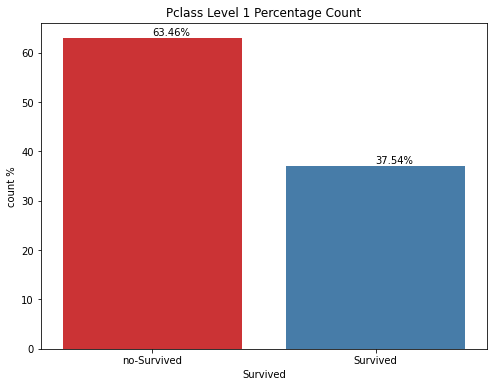

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.barplot(x='Survived', y='count %', data=level1_df, palette='Set1')
no_Survived = round(level1_df.iloc[0,1] + .5, 2)
plt.text(0, no_Survived, f'{no_Survived}%')
Survived = round(level1_df.iloc[1,1] + .5, 2)
plt.text(1, Survived, f'{Survived}%')
plt.title('Pclass Level 1 Percentage Count')
fig.savefig(fname='level1.jpg', dpi=300, transparent=False)
plt.show()

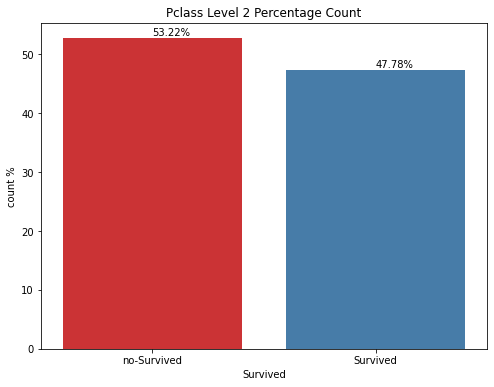

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.barplot(x='Survived', y='count %', data=level2_df, palette='Set1')
no_Survived = round(level2_df.iloc[0,1] + .5, 2)
plt.text(0, no_Survived, f'{no_Survived}%')
Survived = round(level2_df.iloc[1,1] + .5, 2)
plt.text(1, Survived, f'{Survived}%')
plt.title('Pclass Level 2 Percentage Count')
fig.savefig(fname='level2.jpg', dpi=300, transparent=False)
plt.show()

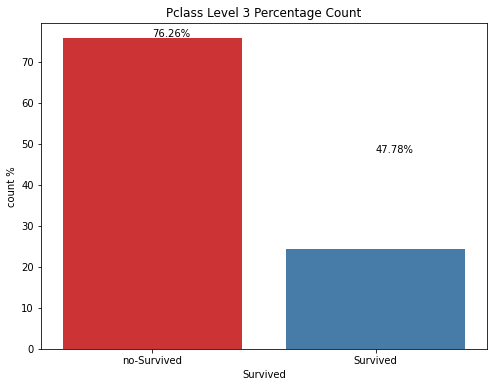

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.barplot(x='Survived', y='count %', data=level3_df, palette='Set1')
no_Survived = round(level3_df.iloc[0,1] + .5, 2)
plt.text(0, no_Survived, f'{no_Survived}%')
default = round(level3_df.iloc[1,1] + .5, 2)
plt.text(1, Survived, f'{Survived}%')
plt.title('Pclass Level 3 Percentage Count')
fig.savefig(fname='level3.jpg', dpi=300, transparent=False)
plt.show()

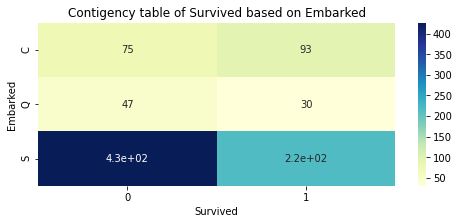

In [34]:
contigency_pct = pd.crosstab(train["Embarked"], train['Survived'])
fig = plt.figure(figsize=(8,3))
plt.title('Contigency table of Survived based on Embarked')
sns.heatmap(contigency_pct, annot=True, cmap="YlGnBu")
fig.savefig('heatmap.jpg', dpi=300)
plt.show()

In [35]:
contigency_pct

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


**observation**

1. out of 168 embarking from  C 44.64% died, while 55.3% survived.
2. out of 77 embarking from Q 61% died, while 38.9% survived.
3. out of 644 embarking from S 66.3% died, while 33.6% survived

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

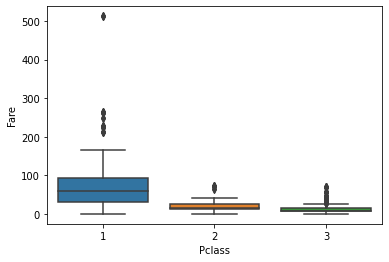

In [36]:
sns.boxplot(x="Pclass",y="Fare", data=train)

In [37]:
train[train["Fare"]>=500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,youth
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,middle aged
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,youth


In [38]:
train[train["Fare"]==0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group
179,180,0,3,"Leonard, Mr. Lionel",male,36.000000,0,0,LINE,0.0,NaN,S,middle aged
263,264,0,1,"Harrison, Mr. William",male,40.000000,0,0,112059,0.0,B94,S,middle aged
271,272,1,3,"Tornquist, Mr. William Henry",male,25.000000,0,0,LINE,0.0,NaN,S,youth
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,29.699118,0,0,239853,0.0,NaN,S,youth
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.000000,0,0,LINE,0.0,NaN,S,teen
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,29.699118,0,0,239853,0.0,NaN,S,youth
466,467,0,2,"Campbell, Mr. William",male,29.699118,0,0,239853,0.0,NaN,S,youth
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,29.699118,0,0,239854,0.0,NaN,S,youth
597,598,0,3,"Johnson, Mr. Alfred",male,49.000000,0,0,LINE,0.0,NaN,S,middle aged
633,634,0,1,"Parr, Mr. William Henry Marsh",male,29.699118,0,0,112052,0.0,NaN,S,youth


In [39]:
Age_group_Encoder=LabelEncoder()
train["Age_group"]=Age_group_Encoder.fit_transform(train["Age_group"])

In [40]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,4
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,4
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,4


In [41]:
Sex_Encoder=LabelEncoder()
train["Sex"]=Sex_Encoder.fit_transform(train["Sex"])

In [42]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,4
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,4
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,4


In [43]:
Embarked_Encoder=LabelEncoder()
train["Embarked"]=Embarked_Encoder.fit_transform(train["Embarked"])

In [44]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,4
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,4
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2,4


In [45]:
median=train['Embarked'].median()
train['Embarked'].fillna(median,inplace=True)

In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int32  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    int32  
 12  Age_group    891 non-null    int32  
dtypes: float64(2), int32(3), int64(5), object(3)
memory usage: 80.2+ KB


In [47]:
X=train[["Age_group","Sex","Embarked","Fare","Pclass"]]
y=train["Survived"]

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [49]:
X_train.shape

(668, 5)

In [50]:
y_train.shape

(668,)

In [51]:
X_test.shape

(223, 5)

In [52]:
y_test.shape

(223,)

In [53]:
log_reg=LogisticRegression()

In [54]:
log_reg.fit(X_train,y_train)

LogisticRegression()

In [55]:
log_reg.score(X_train,y_train) ##training accuracy score##

0.7859281437125748

In [56]:
log_reg.score(X_test,y_test) ##testing accuracy score##

0.7533632286995515

In [85]:
prediction=log_reg.predict(X_test)

***based on our train value count we observed that 549 died while 342 survived **
- positive:died = 0
- negative:survived = 1 .

so from your confussion matrix we already know that 102 represent people that died 

positive is based on what we have on what we have on our confusion matrix

In [58]:
confusion_matrix(y_test,prediction)

array([[102,  32],
       [ 23,  66]], dtype=int64)

**observation**

1. true positive: the machine predicted  102 person  died  and they actually died 
2. false negative: the machine predicted 32 person survived and it was actually died 
3. false positive : the machine predicted 23 person died and it was actually survived 
4. true negative : the machine predicted 66 person survived  times it was actually survived 

***example 1**


we have a data 
data =survived,survived , survived survived , survived,  survivd, died
predictions= survived survived,survived , survived survived , survived,  survived, 

accuracy score = predictions/data
precision score= actual data of survived/prediction of survived 
recall  score: the actual data for died/ by predictions

In [59]:
precision_score(y_test,prediction)

0.673469387755102

In [60]:
recall_score(y_test,prediction)

0.7415730337078652

In [61]:
f1_score(y_test,prediction)

0.7058823529411764

In [62]:
from sklearn.metrics import classification_report

In [63]:
print(classification_report(prediction, y_test))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79       125
           1       0.74      0.67      0.71        98

    accuracy                           0.75       223
   macro avg       0.75      0.74      0.75       223
weighted avg       0.75      0.75      0.75       223



**decision tree classifier**

A classification tree is used to predict a discrete variable
in classification tree, we predict the most occuring variable.

In [64]:
tree=DecisionTreeClassifier(max_depth=2)

In [65]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [66]:
tree.score(X_train,y_train)

0.7889221556886228

In [67]:
tree.score(X_test,y_test)

0.7802690582959642

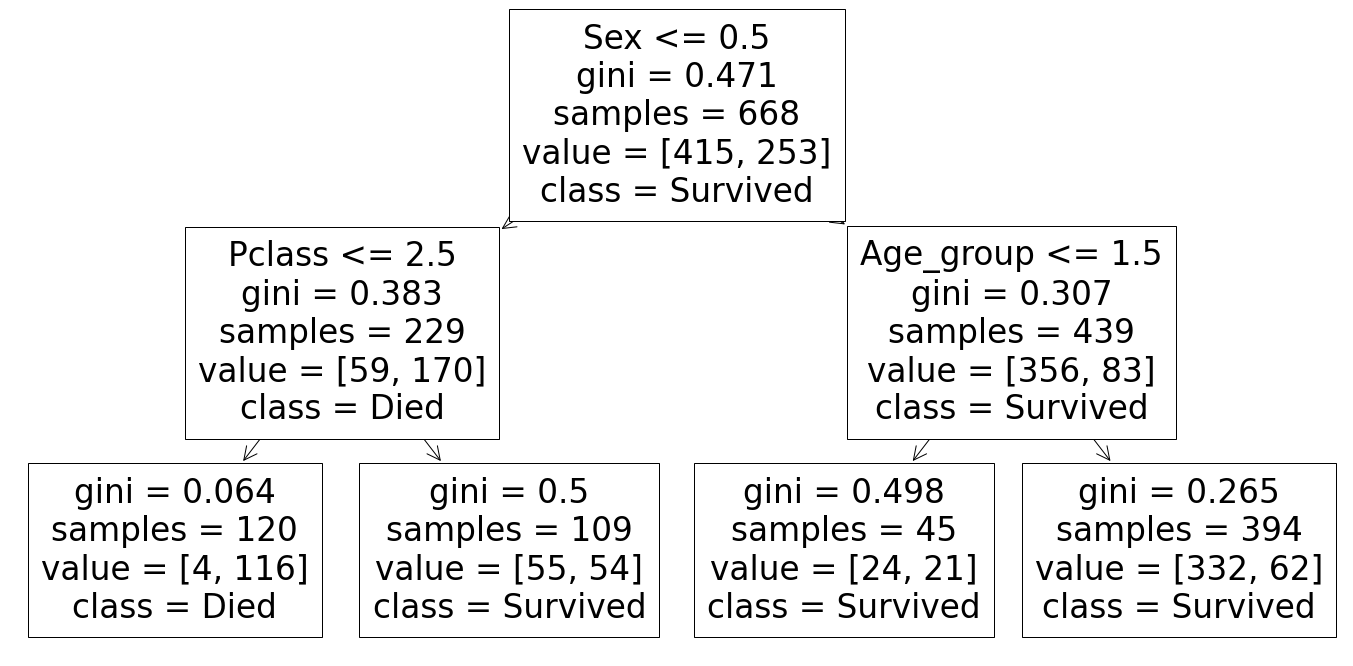

In [68]:
fig,ax=plt.subplots(figsize=(24,12))
tr.plot_tree(tree,ax=ax,feature_names=X_train.columns,class_names=['Survived','Died'])
plt.show()

In [69]:
prediction=tree.predict(X_test)

In [70]:
confusion_matrix(y_test, prediction)

array([[129,   5],
       [ 44,  45]], dtype=int64)

**observation**

1. true positive:the machine predicted died 129 times and it was actually died 
2. false negative: the machine predicted survived 5 times and it was actually died 
3. false positive : the machine predicte died 44 times and it was actually survived 
4. true negative : the machine predicted survived 45 times it was actually survived 

In [71]:
precision_score(y_test,prediction)

0.9

In [72]:
recall_score(y_test,prediction)

0.5056179775280899

In [90]:
f1_score(y_test,prediction)

0.7058823529411764

In [91]:
##model optimization##

In [94]:
param_grid={
    "max_depth":[2,4,6,8,12], ##lower is better33
    "min_samples_split":[12,18,20,12], ##higher is better
    "max_leaf_nodes":[2,8,10,12],  ##lower is better 
}
gs=GridSearchCV(tree,param_grid,cv=3,scoring=make_scorer(f1_score), verbose=32)
gs.fit(X_train,y_train)
tree=gs.best_estimator_

Fitting 3 folds for each of 80 candidates, totalling 240 fits
[CV 1/3; 1/80] START max_depth=2, max_leaf_nodes=2, min_samples_split=12........
[CV 1/3; 1/80] END max_depth=2, max_leaf_nodes=2, min_samples_split=12;, score=0.720 total time=   0.0s
[CV 2/3; 1/80] START max_depth=2, max_leaf_nodes=2, min_samples_split=12........
[CV 2/3; 1/80] END max_depth=2, max_leaf_nodes=2, min_samples_split=12;, score=0.667 total time=   0.0s
[CV 3/3; 1/80] START max_depth=2, max_leaf_nodes=2, min_samples_split=12........
[CV 3/3; 1/80] END max_depth=2, max_leaf_nodes=2, min_samples_split=12;, score=0.730 total time=   0.0s
[CV 1/3; 2/80] START max_depth=2, max_leaf_nodes=2, min_samples_split=18........
[CV 1/3; 2/80] END max_depth=2, max_leaf_nodes=2, min_samples_split=18;, score=0.720 total time=   0.0s
[CV 2/3; 2/80] START max_depth=2, max_leaf_nodes=2, min_samples_split=18........
[CV 2/3; 2/80] END max_depth=2, max_leaf_nodes=2, min_samples_split=18;, score=0.667 total time=   0.0s
[CV 3/3; 2/80

[CV 3/3; 17/80] END max_depth=4, max_leaf_nodes=2, min_samples_split=12;, score=0.730 total time=   0.0s
[CV 1/3; 18/80] START max_depth=4, max_leaf_nodes=2, min_samples_split=18.......
[CV 1/3; 18/80] END max_depth=4, max_leaf_nodes=2, min_samples_split=18;, score=0.720 total time=   0.0s
[CV 2/3; 18/80] START max_depth=4, max_leaf_nodes=2, min_samples_split=18.......
[CV 2/3; 18/80] END max_depth=4, max_leaf_nodes=2, min_samples_split=18;, score=0.667 total time=   0.0s
[CV 3/3; 18/80] START max_depth=4, max_leaf_nodes=2, min_samples_split=18.......
[CV 3/3; 18/80] END max_depth=4, max_leaf_nodes=2, min_samples_split=18;, score=0.730 total time=   0.0s
[CV 1/3; 19/80] START max_depth=4, max_leaf_nodes=2, min_samples_split=20.......
[CV 1/3; 19/80] END max_depth=4, max_leaf_nodes=2, min_samples_split=20;, score=0.720 total time=   0.0s
[CV 2/3; 19/80] START max_depth=4, max_leaf_nodes=2, min_samples_split=20.......
[CV 2/3; 19/80] END max_depth=4, max_leaf_nodes=2, min_samples_split=2

[CV 2/3; 33/80] END max_depth=6, max_leaf_nodes=2, min_samples_split=12;, score=0.667 total time=   0.0s
[CV 3/3; 33/80] START max_depth=6, max_leaf_nodes=2, min_samples_split=12.......
[CV 3/3; 33/80] END max_depth=6, max_leaf_nodes=2, min_samples_split=12;, score=0.730 total time=   0.0s
[CV 1/3; 34/80] START max_depth=6, max_leaf_nodes=2, min_samples_split=18.......
[CV 1/3; 34/80] END max_depth=6, max_leaf_nodes=2, min_samples_split=18;, score=0.720 total time=   0.0s
[CV 2/3; 34/80] START max_depth=6, max_leaf_nodes=2, min_samples_split=18.......
[CV 2/3; 34/80] END max_depth=6, max_leaf_nodes=2, min_samples_split=18;, score=0.667 total time=   0.0s
[CV 3/3; 34/80] START max_depth=6, max_leaf_nodes=2, min_samples_split=18.......
[CV 3/3; 34/80] END max_depth=6, max_leaf_nodes=2, min_samples_split=18;, score=0.730 total time=   0.0s
[CV 1/3; 35/80] START max_depth=6, max_leaf_nodes=2, min_samples_split=20.......
[CV 1/3; 35/80] END max_depth=6, max_leaf_nodes=2, min_samples_split=2

[CV 1/3; 49/80] START max_depth=8, max_leaf_nodes=2, min_samples_split=12.......
[CV 1/3; 49/80] END max_depth=8, max_leaf_nodes=2, min_samples_split=12;, score=0.720 total time=   0.0s
[CV 2/3; 49/80] START max_depth=8, max_leaf_nodes=2, min_samples_split=12.......
[CV 2/3; 49/80] END max_depth=8, max_leaf_nodes=2, min_samples_split=12;, score=0.667 total time=   0.0s
[CV 3/3; 49/80] START max_depth=8, max_leaf_nodes=2, min_samples_split=12.......
[CV 3/3; 49/80] END max_depth=8, max_leaf_nodes=2, min_samples_split=12;, score=0.730 total time=   0.0s
[CV 1/3; 50/80] START max_depth=8, max_leaf_nodes=2, min_samples_split=18.......
[CV 1/3; 50/80] END max_depth=8, max_leaf_nodes=2, min_samples_split=18;, score=0.720 total time=   0.0s
[CV 2/3; 50/80] START max_depth=8, max_leaf_nodes=2, min_samples_split=18.......
[CV 2/3; 50/80] END max_depth=8, max_leaf_nodes=2, min_samples_split=18;, score=0.667 total time=   0.0s
[CV 3/3; 50/80] START max_depth=8, max_leaf_nodes=2, min_samples_split

[CV 1/3; 65/80] START max_depth=12, max_leaf_nodes=2, min_samples_split=12......
[CV 1/3; 65/80] END max_depth=12, max_leaf_nodes=2, min_samples_split=12;, score=0.720 total time=   0.0s
[CV 2/3; 65/80] START max_depth=12, max_leaf_nodes=2, min_samples_split=12......
[CV 2/3; 65/80] END max_depth=12, max_leaf_nodes=2, min_samples_split=12;, score=0.667 total time=   0.0s
[CV 3/3; 65/80] START max_depth=12, max_leaf_nodes=2, min_samples_split=12......
[CV 3/3; 65/80] END max_depth=12, max_leaf_nodes=2, min_samples_split=12;, score=0.730 total time=   0.0s
[CV 1/3; 66/80] START max_depth=12, max_leaf_nodes=2, min_samples_split=18......
[CV 1/3; 66/80] END max_depth=12, max_leaf_nodes=2, min_samples_split=18;, score=0.720 total time=   0.0s
[CV 2/3; 66/80] START max_depth=12, max_leaf_nodes=2, min_samples_split=18......
[CV 2/3; 66/80] END max_depth=12, max_leaf_nodes=2, min_samples_split=18;, score=0.667 total time=   0.0s
[CV 3/3; 66/80] START max_depth=12, max_leaf_nodes=2, min_samples

[CV 3/3; 80/80] END max_depth=12, max_leaf_nodes=12, min_samples_split=12;, score=0.685 total time=   0.0s


***observation**

it will create 80 different  models (5 times 4 times4) the one with  highest f1 score is the one best estimator will select as we can see below 

In [95]:
tree

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=10, min_samples_split=12)

**Decision tree classifiers takes a lot of hyper parameters which include

1. max depth
2. min samples 
3. max leaf 


if we  increase the max depth , the training score tends to inccrease but the testing may  not necessarily increase 

**observation**

1. tree = DecisionTreeClassifier(max_depth=2,min_samples_split=12, max_leaf_nodes=2) f1 score of 80 percent
2. tree = DecisionTreeClassifier(max_depth=4,min_samples_split=18, max_leaf_nodes=8) f1 sore of 70percent 


what this stuff does is that it gives you the model with the best f1 score that is the mean of precision and recall , a high f1 score is good
 

In [76]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=8, min_samples_split=18)

In [77]:
tree.score(X_train,y_train)

0.8308383233532934

In [96]:
tree.score(X_test,y_test)

0.8116591928251121

In [78]:
prediction=tree.predict(X_test)

In [79]:
confusion_matrix(y_test, prediction)

array([[113,  21],
       [ 22,  67]], dtype=int64)

**observation**

1. tp : the computer predicted died 144 times and  it was actually died 
2. fn: the computer predicted survived 20 times it was actually died 
3. fp : the computer predicted died 22 times and it was actually survived
4. tn : the computer predicted survived 62 times and it was actually survived

In [80]:
print(classification_report(prediction, y_test))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       135
           1       0.75      0.76      0.76        88

    accuracy                           0.81       223
   macro avg       0.80      0.80      0.80       223
weighted avg       0.81      0.81      0.81       223



In [81]:
precision_score(y_test,prediction)

0.7613636363636364

In [82]:
recall_score(y_test,prediction)

0.7528089887640449

In [83]:
f1_score(y_test,prediction)

0.7570621468926553

**ways of evaluating model performance include**

1. accuracy score
2. cofusion matrix
3. precision
4. recall
5. f1 score summarises both precision and recall with one valuee 
6. classification report gives all information in one place 

accuracy score can be used for only balanced data set , where the difference between dead and survived quiet balance 

for a situation where the difference between the dead and survived is too large eg 99 percent to 1. the  data is said to be inbalanced and you cant use or rely on accuracy score , you use the rest evaluating model apart  from accuracy score. 

increase the max depth the training score but the testing score might not necessarily increase 
but the fewer the max depth the better your model
